<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 5.3
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

In [1]:
# Import neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

## Linear SVM

Here we will apply a linear kernal to separate two clusters in 2D. This means our solution hyperplane will be a straight line in the x-y plane.  

We will use the `SVC` (support vector classification) algorithm from the `svm` library.

Scikit-learn has a handy function for generating synthetic data in clusters:

In [2]:
# Create 40 separable points:
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 6)

In [3]:
# Shape of X and y
X.shape, y.shape

((40, 2), (40,))

In [4]:
# First four rows of the first and second features and the target labels
print(X[:4,0], X[:4,1], y[:4])

[6.37734541 6.50072722 4.29225906 7.39169472] [-10.61510727  -3.82403586  -8.99220442  -3.1266933 ] [1 0 1 0]


X is a 2-column matrix representing 40 (x,y) pairs and y is the cluster membership vector.

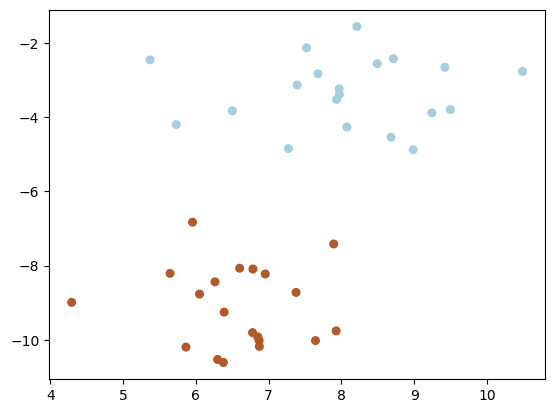

In [5]:
# Create a scatter plot to visualize the data
# X[:, 0] and X[:, 1] represent the x and y coordinates of data points
# 'c' is used to assign colors based on the values in 'y'
# 's' sets the marker size to 30
# 'cmap' defines the color map for the 'c' values
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

Like many Scikit-learn algorithms, svm.SVC applies regularisation by default. For this demo, we will train the model with regularisation suppressed:

In [6]:
# Fit the model, without regularisation (make C large):
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

In [7]:
# Access the support vectors identified by the trained SVM classifier
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

This will plot the data with the solution hyperplane and dividing boundaries superimposed. Make sure to look up any methods you aren't familiar with and add some comments to explain what they are doing.

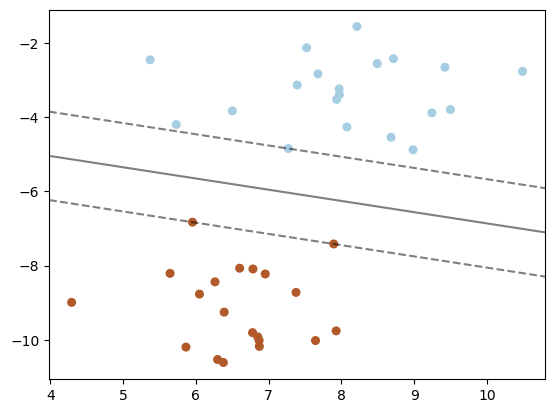

In [8]:
# Create a scatter plot to visualize the data
# X[:, 0] and X[:, 1] represent the x and y coordinates of data points
# 'c' is used to assign colors based on the values in 'y'
# 's' sets the marker size to 30
# 'cmap' defines the color map for the 'c' values
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()  # Get the current axis
xlim = ax.get_xlim()  # Get the x-axis limits
ylim = ax.get_ylim()  # Get the y-axis limits

# Create a grid for evaluating the model
xx = np.linspace(xlim[0], xlim[1], 30)  # Create a linear space for x values
yy = np.linspace(ylim[0], ylim[1], 30)  # Create a linear space for y values
YY, XX = np.meshgrid(yy, xx)  # Create a grid from x and y values
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # Create a grid of (x, y) pairs
Z = clf.decision_function(xy).reshape(XX.shape)  # Calculate decision function values

# Plot the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')

plt.show()  # Display the plot

### Nonlinear SVM

Here we will apply a nonlinear kernel to separate two classes where a linear kernel would fail. For this we will use the `NuSVC` algorithm from the `svm` library.

Generating this dataset relies on a logical trick to classify the points by which quadrant they are in:

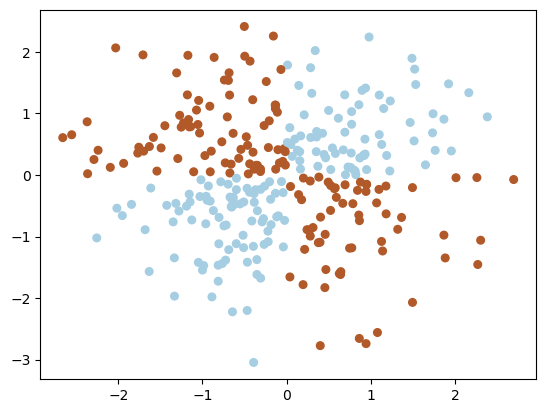

In [9]:
# Set a random seed for reproducibility
np.random.seed(0)

# Generate a 2D dataset with 300 data points
X = np.random.randn(300, 2)

# Create a boolean target variable 'y' using logical XOR
# It will be 'True' if X[:, 0] > 0 XOR X[:, 1] > 0, otherwise 'False'
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Create a scatter plot to visualize the data
# X[:, 0] and X[:, 1] represent the x and y coordinates of data points
# 'c' is used to assign colors based on the values in 'y'
# 's' sets the marker size to 30
# 'cmap' defines the color map for the 'c' values
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired);

For this demo we will train the model using default parameters, so we instantiate an `svm.NuSVC` with no arguments:

In [10]:
# Fit the model
clf = svm.NuSVC()
clf.fit(X, y)

NuSVC()

The next visualisation requires some tricky coding. The `svm.NuSVC` class has a `decision_function` method that we can use to create a heatmap to show how the likelihood of class membership varies over the 2D feature space. The Numpy `meshgrid` function is useful for creating our 2D spatial grid, but the `decision_function` method need the the grid to be passed as a 2D array with x-values in the 1st column and y-values in the second:

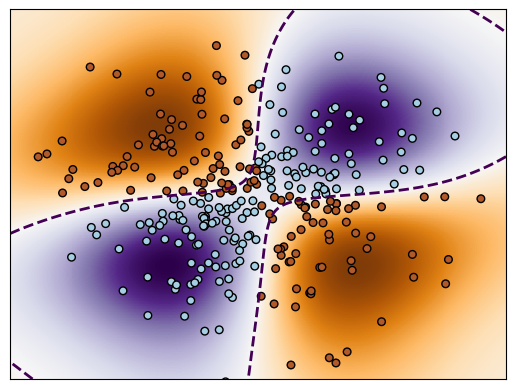

In [11]:
# Plot the decision function for each datapoint on the grid...

# Create a grid of (x, y) coordinates for the 2D feature space
# Using np.meshgrid to generate a grid of points for visualization
# The grid spans from -3 to 3 in both the x and y directions
# The size of the grid is 500x500, resulting in a dense grid of points
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

# Calculate the decision function values for each point in the 2D grid by applying the 'decision_function' method of the SVM classifier 'clf'
# The grid is generated from 'xx' and 'yy' coordinates using 'np.c_' to concatenate them
# 'xx.ravel()' and 'yy.ravel()' flatten the coordinate grids into one-dimensional arrays
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Reshape the 'Z' array to match the shape of the original 'xx' grid
Z = Z.reshape(xx.shape)

# Display a heatmap of the decision function values
# Z contains the decision function values for each point in the 2D feature space

plt.imshow(Z, # Display the data in Z (likelihood of class membership for each point)
           interpolation='nearest', # Use the 'nearest' interpolation method for smoothing
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), # Set the extent of the heatmap based on the grid
           aspect='auto', # Adjust the aspect ratio automatically
           origin='lower', # Set the origin to the lower part of the plot
           cmap=plt.cm.PuOr_r) # Use the 'PuOr_r' color map for coloring the heatmap

# Plot decision boundaries:
contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linestyles = '--')

# Plot original data points:
plt.scatter(X[:, 0], X[:, 1], s = 30, c = y, cmap = plt.cm.Paired, edgecolors = 'k')

# Scaling, final rendering:
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

## === End ===



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



